# Bibliotecas

In [1]:
%run libs.py

# Ingest Data

##  DAS e Militares

In [2]:
tab_milit = pd.read_csv('data/df_cc.csv.gz', compression='gzip')
tab_milit.shape

(882, 25)

In [3]:
tab_milit.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 25 columns):
Unnamed: 0                            882 non-null int64
Nome                                  882 non-null object
CPF_x                                 882 non-null object
ORG_EXERCICIO                         882 non-null object
ORG_LOTACAO                           882 non-null object
DESCRICAO_CARGO                       882 non-null object
Descrição do cargo emprego            12 non-null object
Situação servidor                     882 non-null object
Denominação do órgão de atuação       882 non-null object
UF da UPAG de vinculação              882 non-null object
Denominação unidade organizacional    882 non-null object
UF da Residência                      882 non-null object
Cidade da residência                  882 non-null object
Data início DAS                       882 non-null object
DL nomeação                           871 non-null object
Valor da DAS               

In [4]:
def plot_col(col,title):

    # Graph
    plt.xticks(rotation=45)
    chart = (tab_milit[col].value_counts()).plot(kind='bar',
                                                 align='center',
                                                 figsize=(12, 5))

    chart.set_xticklabels(chart.get_xticklabels(),
                          rotation=45,
                          horizontalalignment='right')

    plt.title(title)
    # Amounts
    df_col = pd.DataFrame(tab_milit[col].value_counts())
    df_col['%'] = (df_col[col] / df_col[col].sum()).round(2)

    return df_col.head()

DESCRICAO_CARGO     %
Coronel                       190  0.22
Tenente-Coronel               118  0.13
Segundo-Sargento               94  0.11
Primeiro-Tenente               88  0.10
Segundo-Tenente                56  0.06

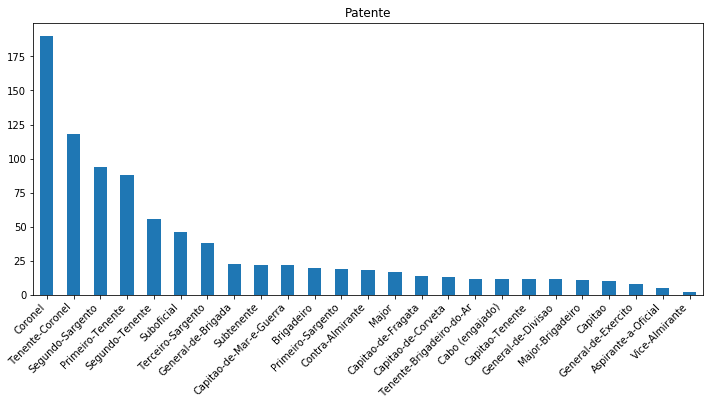

In [5]:
plot_col('DESCRICAO_CARGO', 'Patente')

ORG_EXERCICIO     %
Comando do Exército               584  0.66
Comando da Aeronáutica            160  0.18
Comando da Marinha                138  0.16

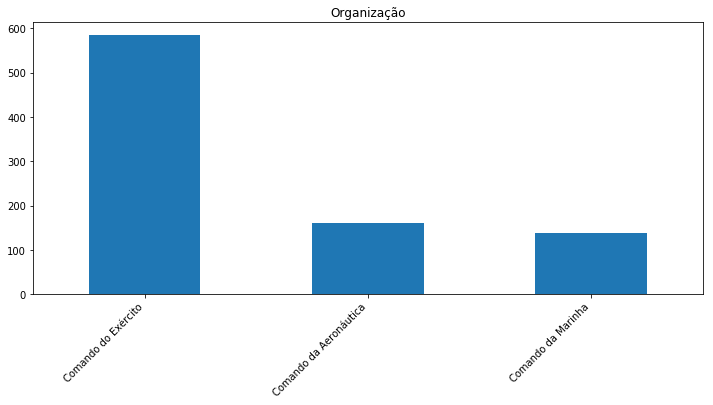

In [6]:
plot_col('ORG_EXERCICIO', 'Organização')

In [7]:
teste=pd.DataFrame(tab_milit.groupby(['Data início DAS', 'ORG_EXERCICIO'])['unique_id'].count()).reset_index()
teste=teste.pivot_table(values='unique_id', columns='ORG_EXERCICIO', index='Data início DAS', fill_value=0)
teste=teste.stack(dropna=False).reset_index()
teste.columns = ['data','orgao','das']
teste['Q_cum'] = teste.groupby('orgao').cumsum()

In [8]:
import plotly.express as px
fig = px.bar(teste,
             x="orgao",
             y="Q_cum",
             animation_frame="data",
             animation_group="orgao",
             color='orgao',
             range_y=[0, 683])
fig.show()

Denominação do órgão de atuação     %
COMANDO DO EXERCITO                                   184  0.21
PRESIDENCIA DA REPUBLICA                              175  0.20
COMANDO DA MARINHA                                     79  0.09
MINISTERIO DA DEFESA                                   58  0.07
MINISTERIO DA JUSTIÇA                                  42  0.05

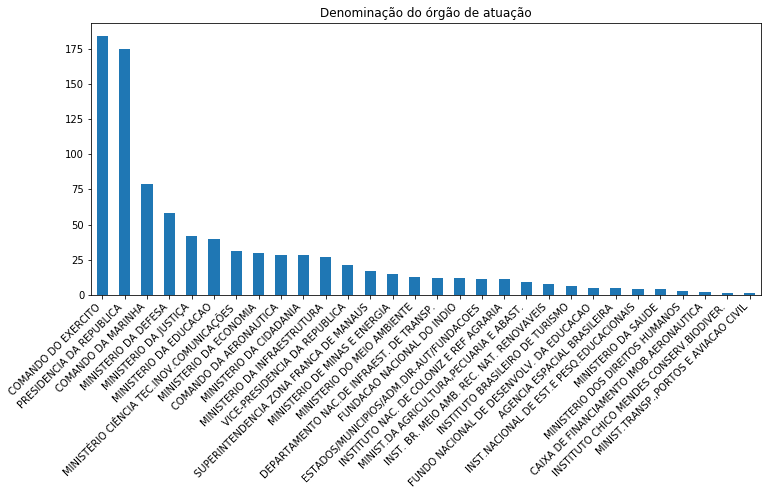

In [9]:
plot_col('Denominação do órgão de atuação', 'Denominação do órgão de atuação')

DESCRICAO_CARGO     %
Coronel                       190  0.22
Tenente-Coronel               118  0.13
Segundo-Sargento               94  0.11
Primeiro-Tenente               88  0.10
Segundo-Tenente                56  0.06

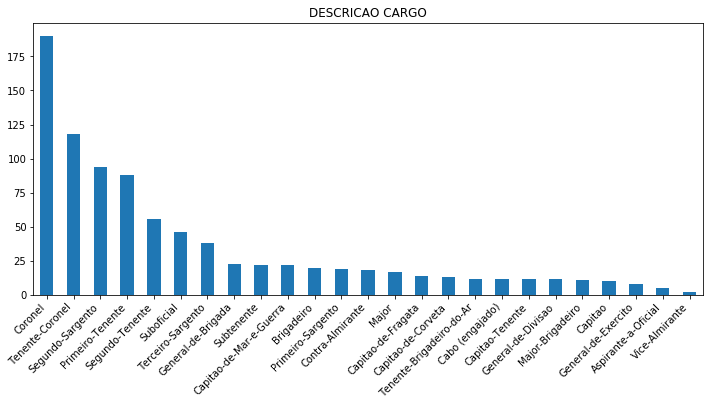

In [10]:
plot_col('DESCRICAO_CARGO', 'DESCRICAO CARGO')

In [80]:
plot_df = pd.DataFrame(tab_milit.groupby(['endereço'])['Nome'].count()).reset_index()
plot_df[''] =  round((plot_df['Nome'] / plot_df['Nome'].sum())*100,2)
plot_df

endereço  Nome       
0            AGUAS CLARAS - DF     2   0.23
1   AGUAS LINDAS DE GOIAS - GO     4   0.45
2                ALVORADA - RS     2   0.23
3                ANAPOLIS - GO     2   0.23
4               ASA NORTE - DF     8   0.91
5                   BELEM - PA     4   0.45
6                BRASILIA - DF   640  72.56
7    CACHOEIRAS DE MACACU - RJ     2   0.23
8                CAMPINAS - SP     6   0.68
9                  CANOAS - RS     2   0.23
10       CIDADE OCIDENTAL - GO     4   0.45
11    COCALZINHO DE GOIAS - GO     2   0.23
12                CORUMBA - MS     2   0.23
13               CURITIBA - PR     3   0.34
14              FORTALEZA - CE     2   0.23
15                   GAMA - DF     2   0.23
16                  GOIAS - GO     1   0.11
17               GRAVATAI - RS     3   0.34
18        ITAQUAQUECETUBA - SP     1   0.11
19          LAGOA FORMOSA - MG     2   0.23
20                 MACEIO - AL     1   0.11
21                MANAIRA - PB     2   0.23
22                 MANAUS - AM    28   3.17
23                  NATAL - RN     2   0.23
24                NITEROI - RJ     3   0.34
25                 OSASCO - SP     8   0.91
26           PORTO ALEGRE - RS     9   1.02
27            PORTO VELHO - RO     2   0.23
28       RECANTO DAS EMAS - DF     1   0.11
29                 RECIFE - PE     4   0.45
30         RIO DE JANEIRO - RJ    68   7.71
31               SALVADOR - BA     1   0.11
32            SANTA MARIA - DF     3   0.34
33            SANTA MARIA - RS     1   0.11
34                 SANTOS - SP     1   0.11
35  SAO BERNARDO DO CAMPO - SP     4   0.45
36    SAO JOSE DOS CAMPOS - SP     2   0.23
37               SAO LUIS - MA     1   0.11
38              SAO PAULO - SP    16   1.81
39             SOBRADINHO - DF     4   0.45
40               SÃO LUIS - MA     1   0.11
41            TAGUATINGUA - DF    13   1.47
42               TERESINA - PI     6   0.68
43            TERESOPOLIS - RJ     2   0.23
44    VALPARAISO DE GOIAS - GO     5   0.57

In [11]:
Colors = list(mcolors.CSS4_COLORS.values())
plot_df = pd.DataFrame(tab_milit.groupby(['lat', 'lng', 'endereço'])['Nome'].count()).reset_index()
plot_df['labels_enc'] = pd.factorize(plot_df['Nome'])[0]

m = folium.Map(location=[-23.53945, -46.6769765], zoom_start=4)
locations = plot_df[['lat', 'lng']]
locationlist = locations.values.tolist()
plot_df['labels_enc'] = pd.factorize(plot_df['endereço'])[0]

for point in range(0, len(locationlist)):
    folium.CircleMarker(location=locationlist[point],
                        tooltip=plot_df['endereço'][point] + " - "+ str(plot_df['Nome'][point]),
                        radius=(math.log1p(plot_df['Nome'][point]))*5,
                        color=Colors[plot_df['labels_enc'][point]+6],
                        fill=True,
                       ).add_to(m)

# https://deparkes.co.uk/2016/06/10/folium-map-tiles/
folium.TileLayer('openstreetmap', attr='openstreetmap').add_to(m)
folium.TileLayer('stamenterrain', attr='stamenterrain').add_to(m)
folium.TileLayer('stamentoner', attr='stamentoner').add_to(m)
folium.TileLayer('stamenwatercolor', attr='stamenwatercolor').add_to(m)
folium.TileLayer('cartodbpositron', attr='cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter', attr='cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)
m

In [12]:
Colors = list(mcolors.CSS4_COLORS.values())
plot_df = pd.DataFrame(tab_milit.groupby(['lat', 'lng', 'endereço'])['Nome'].count()).reset_index()
plot_df['labels_enc'] = pd.factorize(plot_df['Nome'])[0]

m = folium.Map(location=[-23.53945, -46.6769765], zoom_start=4)
locations = plot_df[['lat', 'lng']]
locationlist = locations.values.tolist()
plot_df['labels_enc'] = pd.factorize(plot_df['endereço'])[0]

for point in range(0, len(locationlist)):
    folium.CircleMarker(location=locationlist[point],
                        tooltip=plot_df['endereço'][point] + " - "+ str(plot_df['Nome'][point]),
                        radius=(float(plot_df['Nome'][point]))*.1,
                        color=Colors[plot_df['labels_enc'][point]+6],
                        fill=True,
                       ).add_to(m)

# https://deparkes.co.uk/2016/06/10/folium-map-tiles/
folium.TileLayer('openstreetmap', attr='openstreetmap').add_to(m)
folium.TileLayer('stamenterrain', attr='stamenterrain').add_to(m)
folium.TileLayer('stamentoner', attr='stamentoner').add_to(m)
folium.TileLayer('stamenwatercolor', attr='stamenwatercolor').add_to(m)
folium.TileLayer('cartodbpositron', attr='cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter', attr='cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)
m

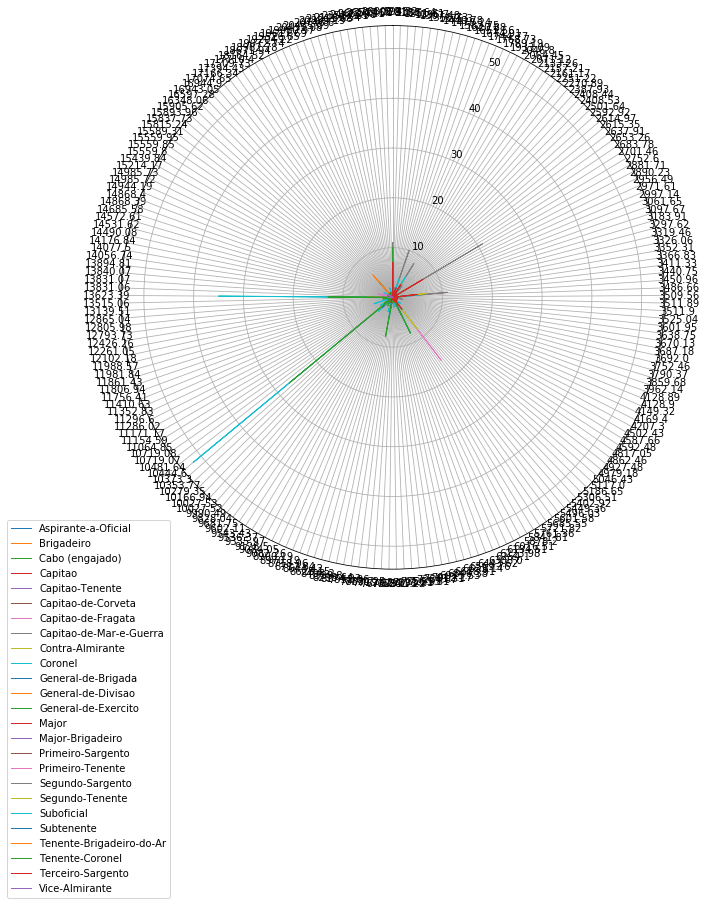

In [75]:
def plot_radar(col1, col2):
    df_relationship = tab_milit.groupby([col1,col2]).size().unstack(fill_value=0)
    
#     for col in df_relationship.columns:
#         df_relationship[col] = df_relationship[col].apply(lambda x : math.log1p(x))

    categories = list(df_relationship.index)
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig = plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)

    ax.set_theta_direction(-1)
    ax.set_theta_offset(pi / 2)
    plt.xticks(angles[:-1], categories)

    for i in range(len(df_relationship.columns)):
        values = list(df_relationship.iloc[:, i])
        values += values[:1]
        ax.plot(angles,
                values,
                linewidth=1,
                linestyle='solid',
                label=df_relationship.columns[i])
        ax.fill(angles, values, alpha=0.1)

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

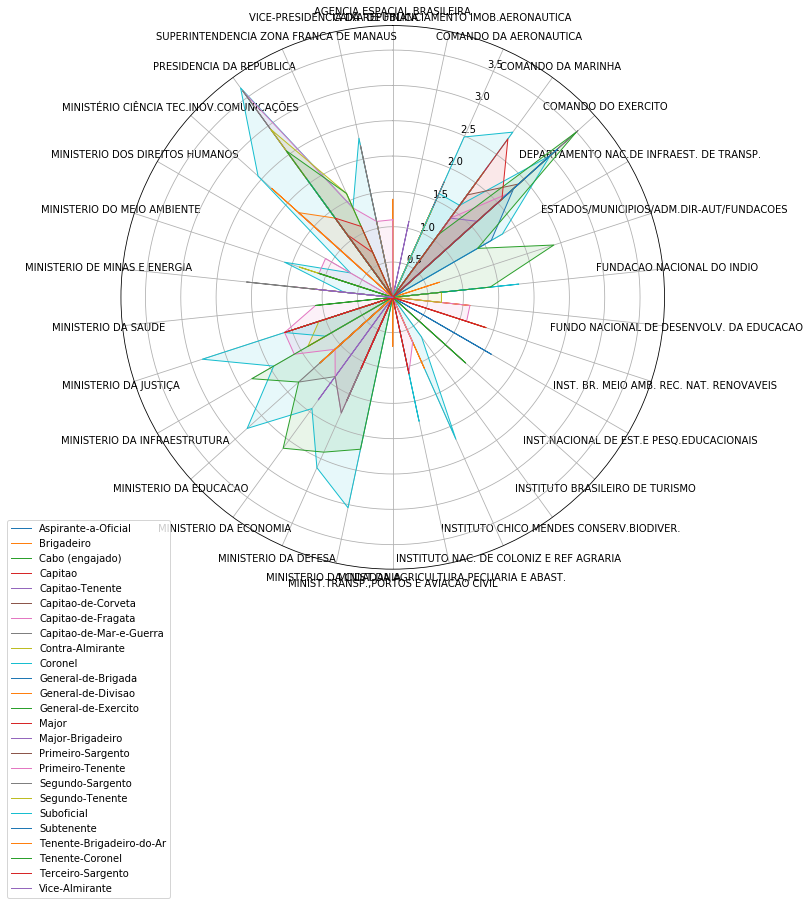

In [67]:
plot_radar('Denominação do órgão de atuação', 'DESCRICAO_CARGO')

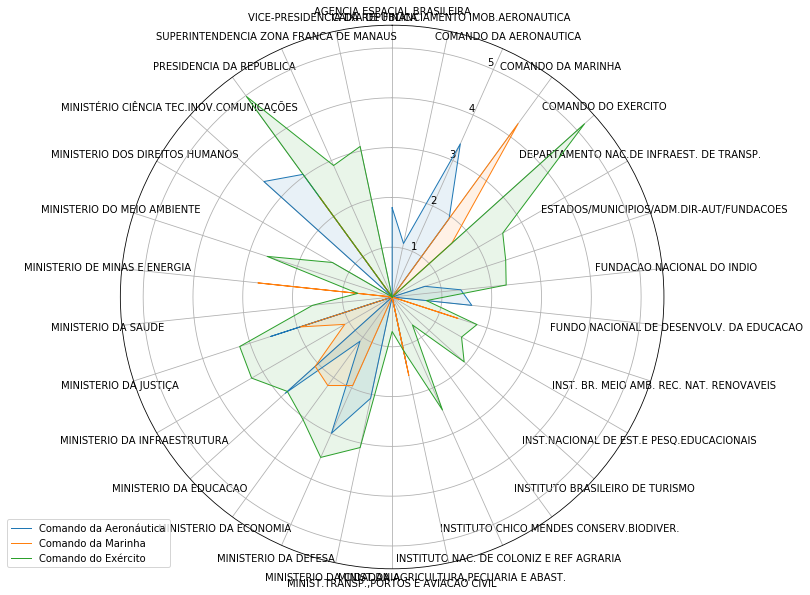

In [68]:
plot_radar('Denominação do órgão de atuação', 'ORG_EXERCICIO')

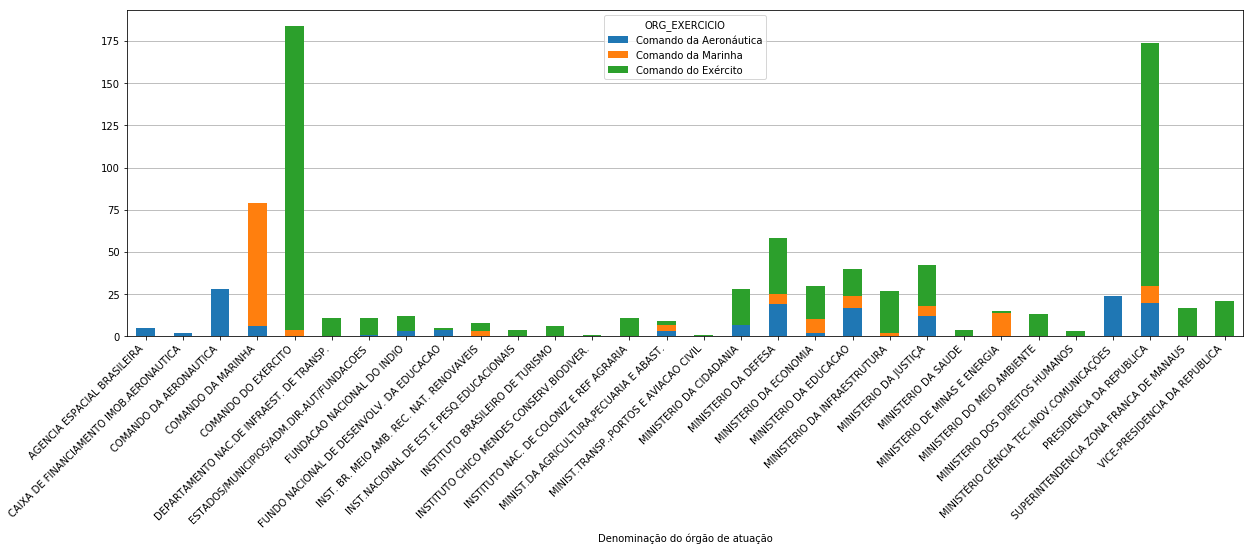

In [16]:
counts = tab_milit.groupby(['Denominação do órgão de atuação', 'ORG_EXERCICIO']).size().unstack(fill_value=0)

fig = plt.figure(figsize=(20, 6))

ax = fig.add_subplot(111)

chart = counts.plot(ax=ax, kind='bar', stacked=True)

chart.set_xticklabels(chart.get_xticklabels(),
                      rotation=45,
                      horizontalalignment='right')

ax.yaxis.grid(True)

ax.set_axisbelow(True)

plt.show()

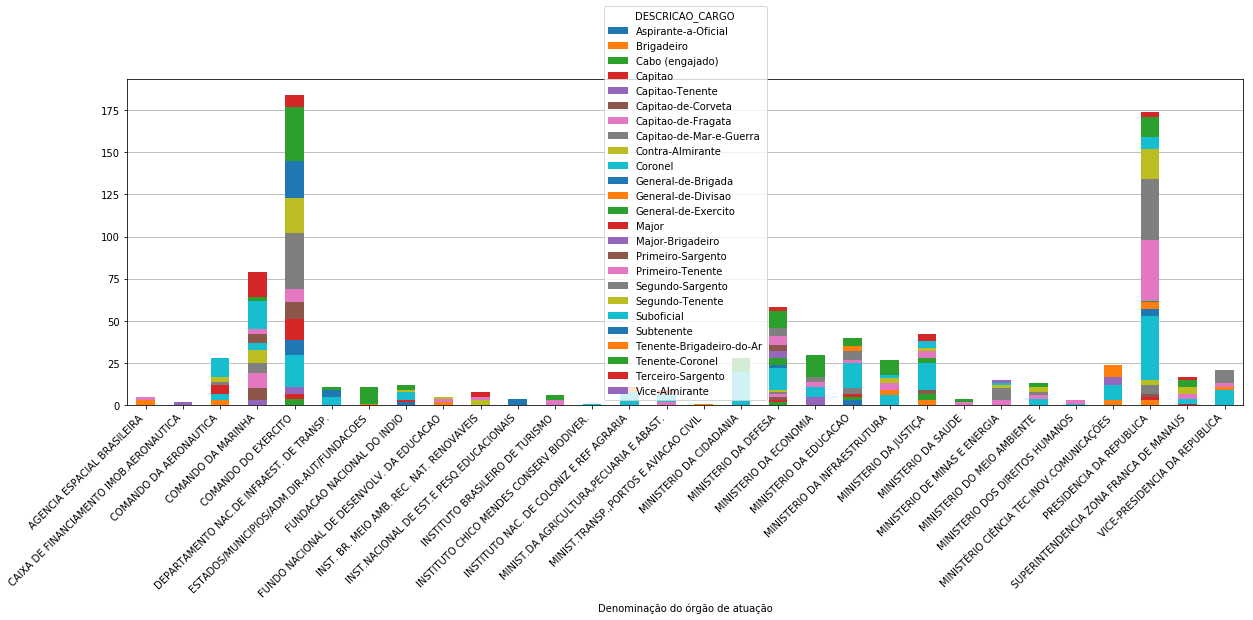

In [17]:
counts = tab_milit.groupby(['Denominação do órgão de atuação', 'DESCRICAO_CARGO']).size().unstack(fill_value=0)

fig = plt.figure(figsize=(20, 6))

ax = fig.add_subplot(111)

chart = counts.plot(ax=ax, kind='bar', stacked=True)

chart.set_xticklabels(chart.get_xticklabels(),
                      rotation=45,
                      horizontalalignment='right')

ax.yaxis.grid(True)

ax.set_axisbelow(True)

plt.show()

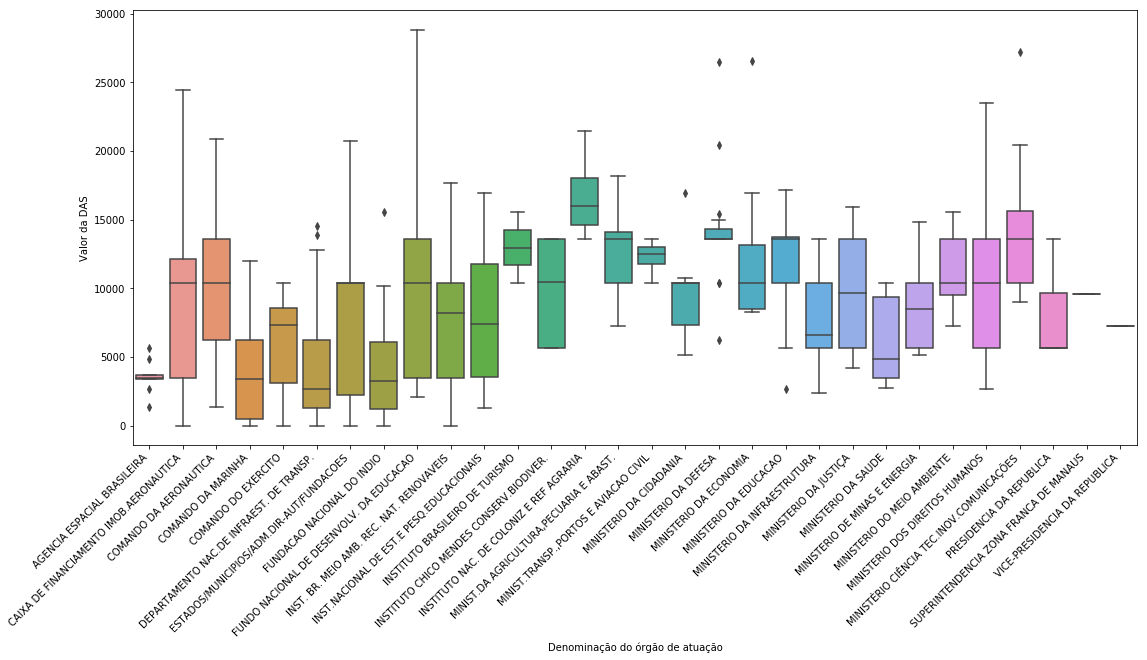

In [18]:
fig = plt.figure(figsize=(18, 8))
ax = sns.boxplot(x='Denominação do órgão de atuação', y="Valor da DAS", data=tab_milit)
ax.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right');

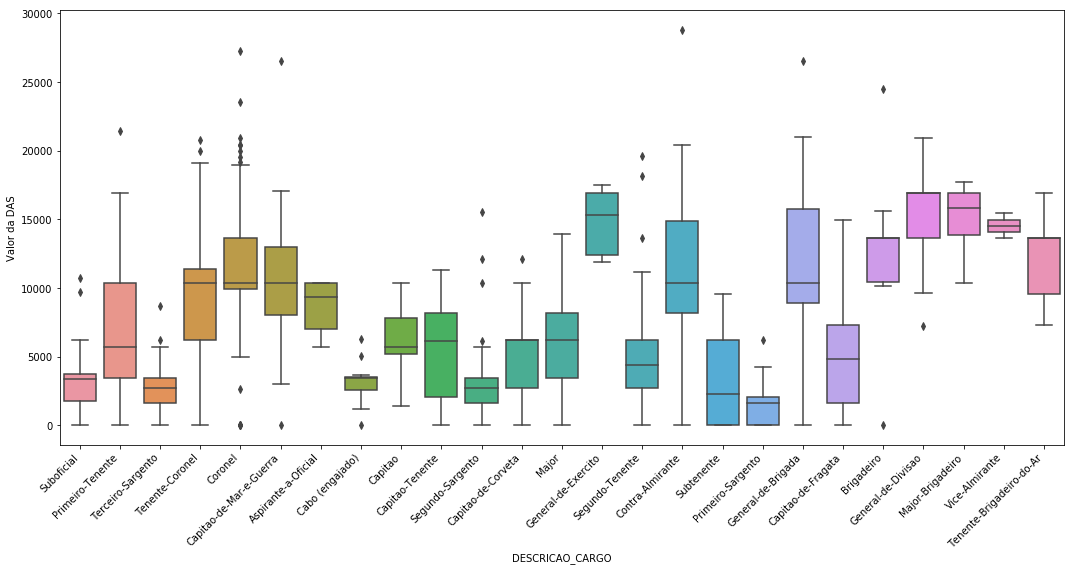

In [19]:
plt.figure(figsize=(18, 8))
ax = sns.boxplot(x="DESCRICAO_CARGO", y="Valor da DAS", data=tab_milit)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

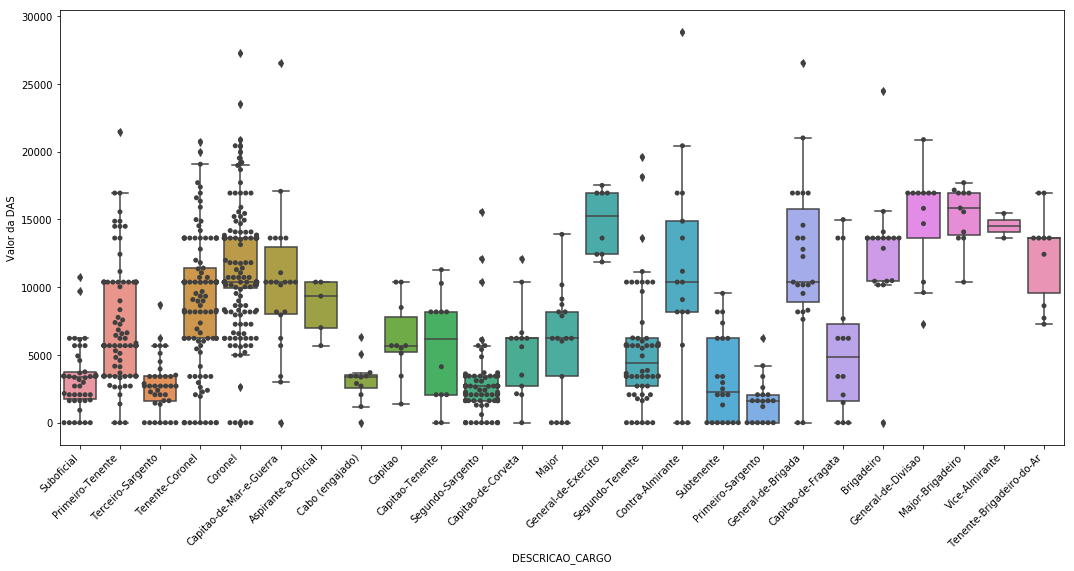

In [20]:
plt.figure(figsize=(18, 8))
ax = sns.boxplot(x="DESCRICAO_CARGO", y="Valor da DAS", data=tab_milit)
ax = sns.swarmplot(x="DESCRICAO_CARGO", y="Valor da DAS", data=tab_milit,color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');